In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load iris dataset 
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
print(knn.score(X_test, y_test))

0.977777777778


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
y_pred = knn.predict(X_test)

In [10]:
print(knn.score(X_test, y_test))

0.973684210526


### using cross validation

In [11]:
from sklearn.cross_validation import cross_val_score

In [13]:
scores = cross_val_score(knn,X, y,cv=5,scoring='accuracy') # no. fold = 5

In [14]:
print(scores)

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]


In [16]:
print(scores.mean())

0.973333333333


### complex example

In [40]:
k_scores =[]
k_range = range(1,31)

In [41]:
import matplotlib.pylab as plt
%matplotlib inline

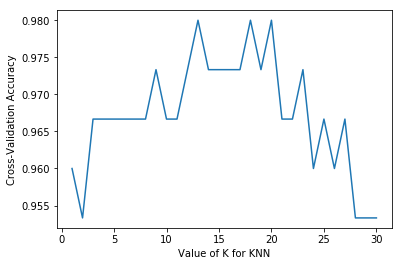

In [42]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
#     loss =  -cross_val_score(knn,X, y,cv=10,scoring='neg_mean_squared_error') # no. fold = 10 for classification

    scores = cross_val_score(knn,X, y,cv=10,scoring='accuracy') # no. fold = 10 for classification
    k_scores .append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

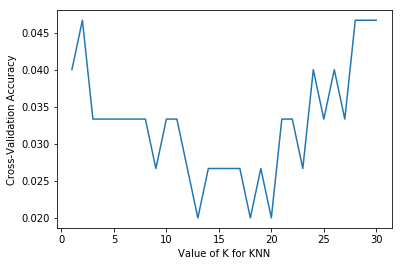

In [31]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    loss =  -cross_val_score(knn,X, y,cv=10,scoring='neg_mean_squared_error') # no. fold = 10 for classification

#     scores = cross_val_score(knn,X, y,cv=10,scoring='accuracy') # no. fold = 10 for classification
    k_scores .append(loss.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()